# Time Series - Double Exponential Smoothing (DES)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import util as u

In [4]:
base_path = "data/I88N-processed/"

In [5]:
# import concatenated data, and available days to sample from
concat_1 = pd.read_csv(base_path + "concat/concat_1.csv")
concat_2 = pd.read_csv(base_path + "concat/concat_2.csv")
concat_3 = pd.read_csv(base_path + "concat/concat_3.csv")

In [57]:
datetime_1 = concat_1["datetime"].values
datetime_1 = pd.to_datetime(datetime_1)

In [196]:
dataset_df_1 = concat_1.loc[concat_1["Date"].isin(dates_format_1)]

In [197]:
dataset_df_2 = concat_2.loc[concat_2["Date"].isin(dates_format_2)]
dataset_df_3 = concat_3.loc[concat_3["Date"].isin(dates_format_2)]

In [202]:
dataset_df_2["Station ID"].unique()

array([400141, 400761, 400490, 401888, 400137, 400716, 401545, 401011,
       400674, 400539, 400534, 401062, 401529, 401613, 400536, 400488,
       401561, 400611, 400928, 400284, 400041, 408133, 408135, 417665,
       412637, 417666, 408134, 400685, 401003, 400898, 400275, 400939,
       400180, 400529, 400990])

In [205]:
len(dataset_df_2.loc[dataset_df_2["Station ID"] == 417666].values)

64512

In [200]:
dates = available_dates

In [206]:
len(dates)

224

The total number of samples collected at one station across all days is 97344, which is equal to 338 days * 24 hours/day * 12 samples/hour.

In [260]:
dataset_df_1.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
33395,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
33396,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
33397,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [6]:
dataset_df_1 = pd.read_csv(base_path + "concat_no_holes/concat_1.csv")
dataset_df_2 = pd.read_csv(base_path + "concat_no_holes/concat_2.csv")
dataset_df_3 = pd.read_csv(base_path + "concat_no_holes/concat_3.csv")

In [8]:
concats = pd.read_csv(base_path + "concat_no_holes/concat.csv")

In [52]:
concat = concats

In [264]:
concat.to_csv(base_path + "concat_no_holes/concat.csv")

In [9]:
available_dates_str = pd.read_csv(base_path + "available_dates.csv").iloc[:, 0].values

In [10]:
available_dates_str[:3]

array(['2017-04-30', '2017-05-01', '2017-05-02'], dtype=object)

In [70]:
dates = list(map(lambda x: pd.to_datetime(x).date(), available_dates_str))

In [21]:
# dataset_df_1 = dataset_df_1.drop(["Unnamed: 0"], axis=1)
dataset_df_1.to_csv(base_path + "concat_no_holes/concat_1.csv", index=False)

In [20]:
# dataset_df_2 = dataset_df_2.drop(["Unnamed: 0"], axis=1)
dataset_df_2.to_csv(base_path + "concat_no_holes/concat_2.csv", index=False)

In [22]:
dataset_df_3 = dataset_df_3.drop(["Unnamed: 0"], axis=1)
dataset_df_3.to_csv(base_path + "concat_no_holes/concat_3.csv", index=False)

In [23]:
concats = concats.drop(["Unnamed: 0"], axis=1)
concats.to_csv(base_path + "concat_no_holes/concat.csv", index=False)

In [24]:
dataset_df_1.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395


In [25]:
dataset_df_2.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,400141,2017-04-30 00:00:00,2.7,175.0,68.1,04/30/2017,00:00,33396


In [26]:
dataset_df_3.tail(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
2064383,401471,2017-12-30 23:55:00,4.0,210.0,60.8,12/30/2017,23:55,3252717


In [71]:
concat.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395


In [28]:
dates[0:2]

[datetime.date(2017, 4, 30), datetime.date(2017, 5, 1)]

In [29]:
dates_format_1 = available_dates_str

In [30]:
dates_format_1[0:3]

array(['2017-04-30', '2017-05-01', '2017-05-02'], dtype=object)

In [72]:
dates_format_2 = list(map(lambda x: x.split('-')[1] + "/" + x.split('-')[2] + "/" + x.split('-')[0], available_dates_str))

In [73]:
dates_format_2[0:3]

['04/30/2017', '05/01/2017', '05/02/2017']

## Exception found: we want the dates to start from 2017-04-30

In [ ]:
available_dates[0:10]

In [188]:
pd.DataFrame(available_dates).to_csv(base_path + "available_dates.csv", index=False)

## Loading incidents

Upstream is of type int, and downstream is of type string, since the last station has no downstream by definition and each road segment has an upstream station.

In [33]:
incidents = pd.read_csv(base_path + "incidents.csv")

In [76]:
dates[0:3]

[datetime.date(2017, 4, 30),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 5, 2)]

In [37]:
len(incidents["ID"].values)

6722

In [38]:
len(incidents.loc[incidents["Duration"].apply(lambda x: int(x) >= 5)]["ID"].values)

5234

In [39]:
valid_incidents = incidents.loc[incidents["Duration"].apply(lambda x: int(x) >= 5)]

In [40]:
valid_incidents.to_csv(base_path + "valid_incidents.csv")

# Is there any temporal correlation in the data?  Visulize data at one station, in one day

In [41]:
import matplotlib.pyplot as plt

In [53]:
stations = concat["Station ID"].unique()

There is a problem here.  The two stations, 417665 and 417666, have records starting from 2007-04-29, and started to collect data on 2007-04-30 (notice that speed, flow and occupancy are all constant on 2007-04-29).  Therefore we discard the data before date 2007-04-29.

In [46]:
len(valid_incidents)

5234

Finally, there are 224 days of data available for use, and the total number of records for each station is 64512.

In [54]:
len(stations)

102

In [55]:
stations[0:10]

array([408907, 400951, 400057, 400147, 400343, 401560, 400045, 400122,
       401541, 402281])

In [115]:
sample_station = np.random.choice(stations)
sample_date, sample_date2 = np.random.choice(dates, 2)

In [116]:
print(sample_station, sample_date, sample_date2)

400041 2017-09-13 2017-06-24


In [90]:
concat["Date"].values

array(['04/30/2017', '04/30/2017', '04/30/2017', ..., '12/30/2017',
       '12/30/2017', '12/30/2017'], dtype=object)

In [117]:
sample_df = concat.loc[(concat["Station ID"] == sample_station) & (concat["Date"] == sample_date.strftime("%m/%d/%Y"))]
sample_df2 = concat.loc[(concat["Station ID"] == sample_station) & (concat["Date"] == sample_date2.strftime("%m/%d/%Y"))]

### Occupancy (%)

In [102]:
sample_x = sample_df["Time"].values

<Figure size 432x288 with 0 Axes>

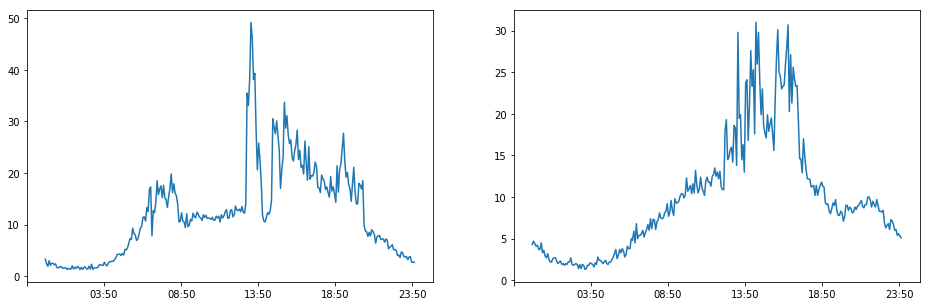

In [118]:
sample_occ = sample_df["Occupancy"].values
sample_occ2 = sample_df2["Occupancy"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_occ)
ax2.plot(sample_x, sample_occ2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

### Flow (number of cars / 5 minutes)

<Figure size 432x288 with 0 Axes>

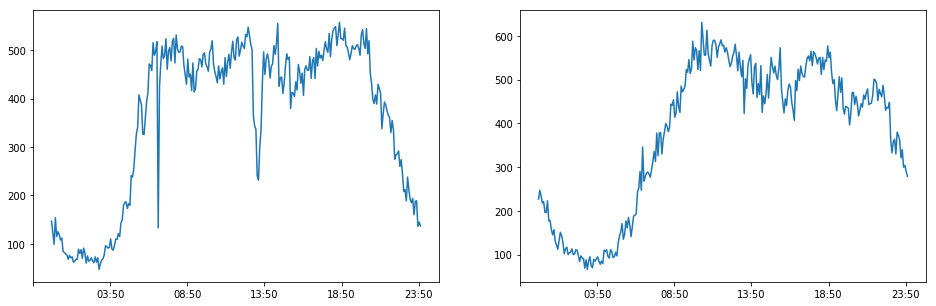

In [119]:
sample_flow = sample_df["Flow"].values
sample_flow2 = sample_df2["Flow"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_flow)
ax2.plot(sample_x, sample_flow2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

### Speed (mph)

<Figure size 432x288 with 0 Axes>

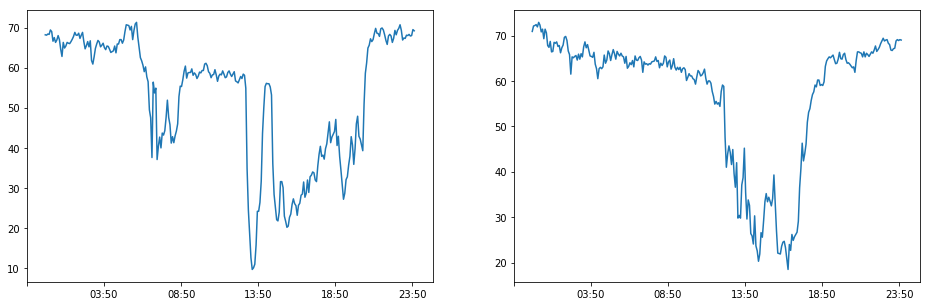

In [120]:
sample_speed = sample_df["Speed"].values
sample_speed2 = sample_df2["Speed"].values

plt.gcf().clear()
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(sample_x, sample_speed)
ax2.plot(sample_x, sample_speed2)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 60))
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 60))

plt.show()

# Bootstrapping data

TODO: One idea - we can keep a rational proportion between weekdays and weekends in the sample data.

In [121]:
len(dates)

224

In [122]:
dates_train = np.random.choice(dates, 112)

In [123]:
dates_test = list(set(dates).difference(set(dates_train)))
dates_test.sort()

In [124]:
len(dates_train), len(dates_test)

(112, 140)

In [125]:
dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), dates_train))
dates_test_str = list(map(lambda x: x.strftime("%m/%d/%Y"), dates_test))
dates_train_str.sort()
dates_test_str.sort()

In [126]:
dates_train_str[:3], dates_test_str[:3]

(['04/30/2017', '05/01/2017', '05/01/2017'],
 ['05/03/2017', '05/04/2017', '05/08/2017'])

In [127]:
df_train = concat.loc[concat["Date"].isin(dates_train_str)]
df_test = concat.loc[concat["Date"].isin(dates_test_str)]

In [128]:
df_train.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
1,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
2,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [129]:
df_test.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
864,408907,2017-05-03 00:00:00,0.7,27.0,67.3,05/03/2017,00:00,34259
865,408907,2017-05-03 00:05:00,0.8,32.0,68.5,05/03/2017,00:05,34260
866,408907,2017-05-03 00:10:00,0.4,13.0,67.7,05/03/2017,00:10,34261


## DES: Tune and save parameters for each variable, and each detector station

$$S_1(t) = \alpha X(i,t) + (1 - \alpha) S_1(t-1)$$
$$S_2(t) = \alpha S_1(t) + (1 - \alpha) S_2(t-1)$$
$$A(t) = 2S_1(t) - S_2(t)$$
$$B(t) = \frac{\alpha}{1 - \alpha} [S_1(t) - S_2(t)]$$
and finally,
$$Y(i, t+1) = A(i, t) + B(i, t),$$
where $i$ denotes a detector station named $i$.

### How to define "normal days" for a detector?

Of course a "normal" day is a day when no incident happens and the traffic state at the detector station is normal overall.  But how can we determine a normal day?

Suppose a lane-blocking incident happens between two adjacent road segments B (upstream) and E (downstream).  Then B and E are both likely to be affected because the occupancy at B may increase and E decrease in a short time.  Hence at present, let's suppose both B and E are affected, and the rest upstream and downstream stations are unaffected.

In [130]:
station = np.random.choice(stations)

In [131]:
station

402800

In [132]:
abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
normal_dates_train.sort()
normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

In [133]:
df_train_station.head(5)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
1419264,402800,2017-04-30 00:00:00,2.5,218.0,72.4,04/30/2017,00:00,2269619
1419265,402800,2017-04-30 00:05:00,1.8,151.0,72.1,04/30/2017,00:05,2269620
1419266,402800,2017-04-30 00:10:00,2.1,173.0,71.3,04/30/2017,00:10,2269621
1419267,402800,2017-04-30 00:15:00,2.0,173.0,72.0,04/30/2017,00:15,2269622
1419268,402800,2017-04-30 00:20:00,2.0,172.0,71.7,04/30/2017,00:20,2269623


In [240]:
var_name = "Speed"
var_series = df_train_station[var_name].values

In [241]:
var_series[:5]

array([68.7, 70.4, 70.3, 70.9, 65.5])

In [196]:
# initialize data using the first ten points
alphas = np.arange(1000) / 1000.
# for each alpha, perform exponential smoothing, and compute RMSE
alpha = np.random.choice(alphas)
beta = round(1. - alpha, 3)

In [197]:
alpha, beta

(0.074, 0.926)

In [261]:
alpha = .7
beta = .3

In [256]:
len(var_series)

24192

In [262]:
sse = 0.
s1 = [0.] * len(var_series)
s2 = [0.] * len(var_series)
y = [0.] * len(var_series)
# initialize values
s1[10] = np.mean(var_series[:10])
s2[10] = s1[10]
for i in range(11, len(var_series) - 1):
    s1[i] = alpha * var_series[i] + beta * s1[i-1]
    s2[i] = alpha * s1[i] + beta * s2[i-1]
    y[i+1] = 2 * s1[i] - s2[i] + alpha / beta * (s1[i] - s2[i])
    sse += (var_series[i+1] - y[i+1]) ** 2

In [263]:
# compute RMSE
diff = var_series - y
diff = diff[12:len(var_series)]

In [264]:
rmse = np.sqrt( np.mean(diff ** 2) )
rmse

3.0259644677551067

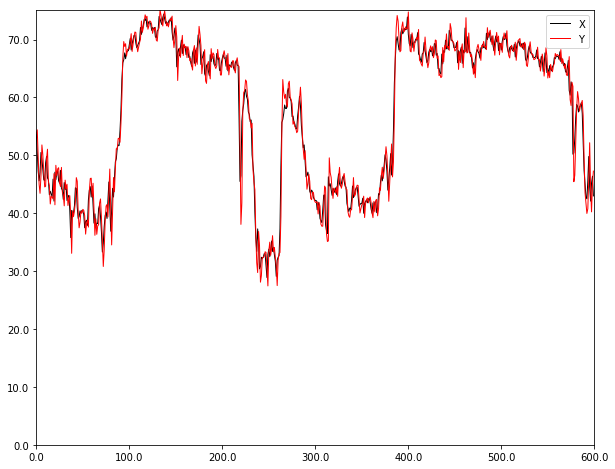

In [266]:
u.plot_time_series(var_series[20300:20900], y[20300:20900], X_label="X", Y_label="Y")

In [224]:
np.sqrt( sse/ (len(var_series) - 12) )

2.0930696264644015

*TODO*: We don't actually need the vectors s1, s2 and y to get rmse.  Implement a memory-efficient solution.

### Memory-efficient form

In [225]:
sse = 0.
s1 = np.mean(var_series[:10])
s2 = s1
y = None
for i in range(11, len(var_series) - 1):
    s1 = alpha * var_series[i] + beta * s1
    s2 = alpha * s1 + beta * s2
    y_next = 2 * s1 - s2 + alpha / beta * (s1 - s2)
    sse += (var_series[i+1] - y_next) ** 2

In [226]:
np.sqrt( sse/ (len(var_series) - 12) )

2.0930696264644015

## Put the above code together!

We also want to save the best alphas for each variable. Use a dictionary, transform it to pandas dataframe, and save to csv.

In [146]:
var_names = ["Speed", "Flow", "Occupancy"]

In [227]:
def DES_rmse(alpha, var_series):
    len_series = len(var_series)
    
    beta = round(1. - alpha, 3)

    sse = 0.
    s1 = np.mean(var_series[:10])
    s2 = s1
    
    for i in range(11, len_series - 1):
        s1 = alpha * var_series[i] + beta * s1
        s2 = alpha * s1 + beta * s2
        y_next = 2 * s1 - s2 + alpha / beta * (s1 - s2)
        sse += (var_series[i+1] - y_next) ** 2
    
    return np.sqrt( sse / (len_series - 12) )

In [228]:
DES_rmse(alpha, var_series)

2.0930696264644015

In [237]:
DES_rmse_vector(alpha, var_series)

2.093069626464403

In [236]:
def DES_rmse_vector(alpha, var_series):
    len_series = len(var_series)
    
    beta = round(1. - alpha, 3)
    s1 = [0.] * len_series
    s2 = [0.] * len_series
    y = [0.] * len_series

    # initialize values
    s1[10] = np.mean(var_series[:10])
    s2[10] = s1[10]
    
    # time series prediction
    for t in range(11, len_series - 1):
        s1[t] = alpha * var_series[t] + beta * s1[t-1]
        s2[t] = alpha * s1[t] + beta * s2[t-1]
        y[t+1] = 2 * s1[t] - s2[t] + alpha / beta * (s1[t] - s2[t])

    # compute RMSE
        diff = var_series - y
        diff = diff[12:len(var_series)]
        rmse = np.sqrt( np.mean(diff ** 2) )
    
    return rmse

In [238]:
best_alphas = {
    'Station ID': [],
    'Speed': [],
    'Flow': [],
    'Occupancy': []
}
num_grids = 10
for i, station in enumerate(stations):
    best_alphas['Station ID'].append(station)
    
    # update current training station dataframe, the training data is normal day's data
    abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
    normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
    normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
    df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

    df_train_station = df_train.loc[df_train["Station ID"] == station]
    print(station)
    for var_name in var_names:
        var_series = df_train_station[var_name].values
        len_series = len(var_series)
        
        # setting up alphas
        alphas = np.arange(num_grids) * 1. / num_grids
        
        # save the historical best alpha by rmse
        best_rmse = float("inf")
        best_alpha = 0.
        
        # for each alpha, perform exponential smoothing, and compute RMSE
        for alpha in alphas:
            beta = round(1. - alpha, 3)
            s1 = [0.] * len_series
            s2 = [0.] * len_series
            y = [0.] * len_series
            
            # initialize values
            s1[10] = np.mean(var_series[:10])
            s2[10] = s1[10]
            
            # time series prediction
            for t in range(11, len_series-1):
                s1[t] = alpha * var_series[t] + beta * s1[t-1]
                s2[t] = alpha * s1[t] + beta * s2[t-1]
                y[t+1] = 2 * s1[t] - s2[t] + alpha / beta * (s1[t] - s2[t])
            
            # compute RMSE
            diff = var_series - y
            diff = diff[12:len(var_series)]
            rmse = np.sqrt( np.mean(diff ** 2) )
            
            # compare, and decide whether to update best alpha
            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha
        
        # finally, save the best alpha for the variable at this station
        best_alphas[var_name].append(best_alpha)
    
    # print trained alphas for each station
    print(best_alphas['Station ID'][i], best_alphas['Speed'][i], best_alphas['Flow'][i], best_alphas['Occupancy'][i])

408907
408907 0.7 0.2 0.5
400951
400951 0.7 0.2 0.5
400057
400057 0.7 0.2 0.4
400147
400147 0.7 0.2 0.4
400343
400343 0.7 0.2 0.4
401560
401560 0.6 0.2 0.3
400045
400045 0.7 0.2 0.3
400122
400122 0.7 0.3 0.4
401541
401541 0.6 0.2 0.3
402281
402281 0.5 0.2 0.3
402283
402283 0.4 0.2 0.3
402285
402285 0.5 0.2 0.3
402286
402286 0.4 0.2 0.2
400088
400088 0.4 0.2 0.2
402288
402288 0.4 0.2 0.2
413026
413026 0.5 0.2 0.4
401464
401464 0.6 0.2 0.4
401489
401489 0.6 0.2 0.5
401538
401538 0.4 0.2 0.3
402290
402290 0.5 0.2 0.4
402292
402292 0.6 0.2 0.4
401643
401643 0.7 0.2 0.4
402800
402800 0.5 0.3 0.3
402828
402828 0.7 0.2 0.3
407219
407219 0.6 0.2 0.3
402789
402789 0.6 0.2 0.3
408755
408755 0.7 0.2 0.3
402802
402802 0.6 0.1 0.2
408756
408756 0.7 0.2 0.3
400189
400189 0.6 0.2 0.3
400309
400309 0.6 0.2 0.3
400417
400417 0.5 0.2 0.3
400249
400249 0.7 0.2 0.4
401639
401639 0.8 0.2 0.5
400662
400662 0.6 0.2 0.3
400141
400141 0.6 0.2 0.3
400761
400761 0.6 0.2 0.3
400490
400490 0.5 0.2 0.3
401888
40188

KeyboardInterrupt: 

### Memory-efficient version

The time needed to find optimal alpha for three traffic variables at one single detector station is approximately 2 minutes.

In [267]:
best_alphas = {
    'Station ID': [],
    'Speed': [],
    'Flow': [],
    'Occupancy': []
}
num_grids = 1000
for i, station in enumerate(stations):
    best_alphas['Station ID'].append(station)
    
    # update current training station dataframe, the training data is normal day's data
    abnormal_dates_station = incidents.loc[(incidents["Upstream"] == station) | (incidents["Downstream"] == str(station))]["Date"].unique()
    normal_dates_train = list(set(dates_train).difference(set(abnormal_dates_station)))
    normal_dates_train_str = list(map(lambda x: x.strftime("%m/%d/%Y"), normal_dates_train))
    df_train_station = df_train.loc[(df_train["Station ID"] == station) & (df_train["Date"].isin(normal_dates_train_str))]

    df_train_station = df_train.loc[df_train["Station ID"] == station]
    print(station)
    for var_name in var_names:
        var_series = df_train_station[var_name].values
        len_series = len(var_series)
        
        # setting up alphas
        alphas = np.arange(num_grids) * 1. / num_grids
        
        # save the historical best alpha by rmse
        best_rmse = float("inf")
        best_alpha = 0.
        
        # for each alpha, perform exponential smoothing, and compute RMSE
        for alpha in alphas:
            rmse = DES_rmse(alpha, var_series)
            
            # compare, and decide whether to update best alpha
            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha
        
        # finally, save the best alpha for the variable at this station
        best_alphas[var_name].append(best_alpha)
    
    # print trained alphas for each station
    print(best_alphas['Station ID'][i], best_alphas['Speed'][i], best_alphas['Flow'][i], best_alphas['Occupancy'][i])

408907
408907 0.72 0.201 0.525
400951
400951 0.742 0.212 0.524
400057
400057 0.738 0.218 0.443
400147
400147 0.724 0.235 0.419
400343
400343 0.683 0.239 0.363
401560
401560 0.592 0.177 0.319
400045
400045 0.679 0.182 0.279
400122
400122 0.704 0.255 0.407
401541
401541 0.641 0.225 0.292
402281
402281 0.534 0.214 0.295
402283
402283 0.441 0.228 0.305
402285
402285 0.528 0.184 0.281
402286
402286 0.448 0.193 0.186
400088
400088 0.425 0.184 0.169
402288
402288 0.394 0.241 0.161
413026
413026 0.506 0.173 0.382
401464
401464 0.572 0.198 0.427
401489
401489 0.61 0.209 0.451
401538
401538 0.371 0.208 0.337
402290
402290 0.539 0.211 0.392
402292
402292 0.628 0.22 0.383
401643
401643 0.696 0.232 0.404
402800
402800 0.52 0.253 0.29
402828
402828 0.68 0.191 0.326
407219
407219 0.56 0.194 0.295
402789
402789 0.598 0.244 0.321
408755
408755 0.714 0.217 0.34
402802
402802 0.565 0.136 0.206
408756
408756 0.696 0.211 0.345
400189
400189 0.588 0.208 0.268
400309
400309 0.6 0.21 0.302
400417
400417 0.514

In [269]:
best_alphas_df = pd.DataFrame(best_alphas)
best_alphas_df.to_csv(base_path + "best_alphas.csv", index=False)